### Suppose that I fit a logistic regression model using historical data collected from students
$$\ln\left(\frac{p}{1-p}\right) = -3 + 0.8 \times \text{Hours_Studied} + 1.5 \times \text{Review_Session}$$


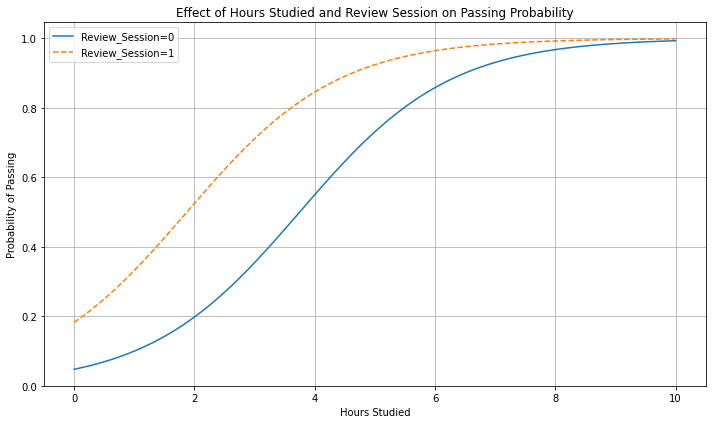

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)
    
log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model for log odds
def compute_log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

def calculate_passing_probability(hours_studied, review_session):    
    # 1. Calculate the log odds
    log_odds_val = compute_log_odds(hours_studied, review_session)

    # 2. Calculate the odds
    odds_val = np.exp(log_odds_val)

    # 3. Calculate the likelihood of passing
    probability = logistic_function(log_odds_val)

    # Print the results with input parameters
    print(f'For Hours Studied: {hours_studied}, Review Session: {review_session} \n-> Log Odds: {log_odds_val}, Odds: {odds_val}, Probability of Passing: {probability}')
    print('-' * 80)  # print a separator for better readability


#What is his (1) log odds, (2) odds, and (3) likelihood of passing the exam?
# Thomas studied for two hours and did not attend the review session.
calculate_passing_probability(2, 0)

#If Thomas goes to the review session
calculate_passing_probability(2, 1)



For Hours Studied: 2, Review Session: 0 
-> Log Odds: -1.4, Odds: 0.2465969639416065, Probability of Passing: 0.19781611144141825
--------------------------------------------------------------------------------
For Hours Studied: 2, Review Session: 1 
-> Log Odds: 0.10000000000000009, Odds: 1.1051709180756477, Probability of Passing: 0.52497918747894
--------------------------------------------------------------------------------


## Using the dataset “student_data.csv,” write code to (1) create a visualization of the data, 

   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


/var/folders/55/psgbxphd7f5g_1x3z8yr8gy00000gn/T/ipykernel_1226/3865670655.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hours_Studied_Binned', y='Results', data=df, hue='Review_Session', palette="magma", ci=None)


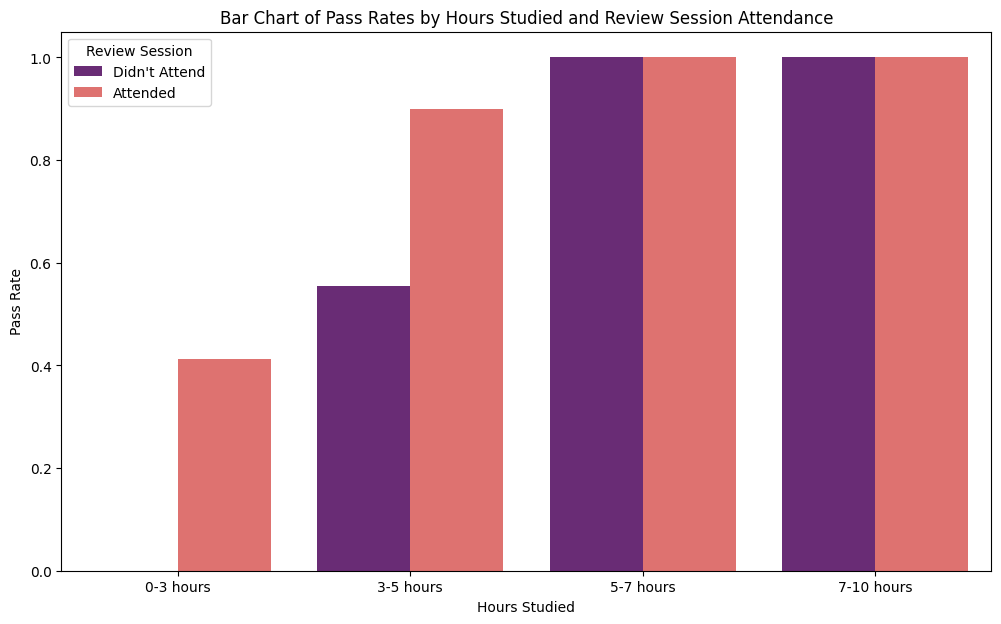

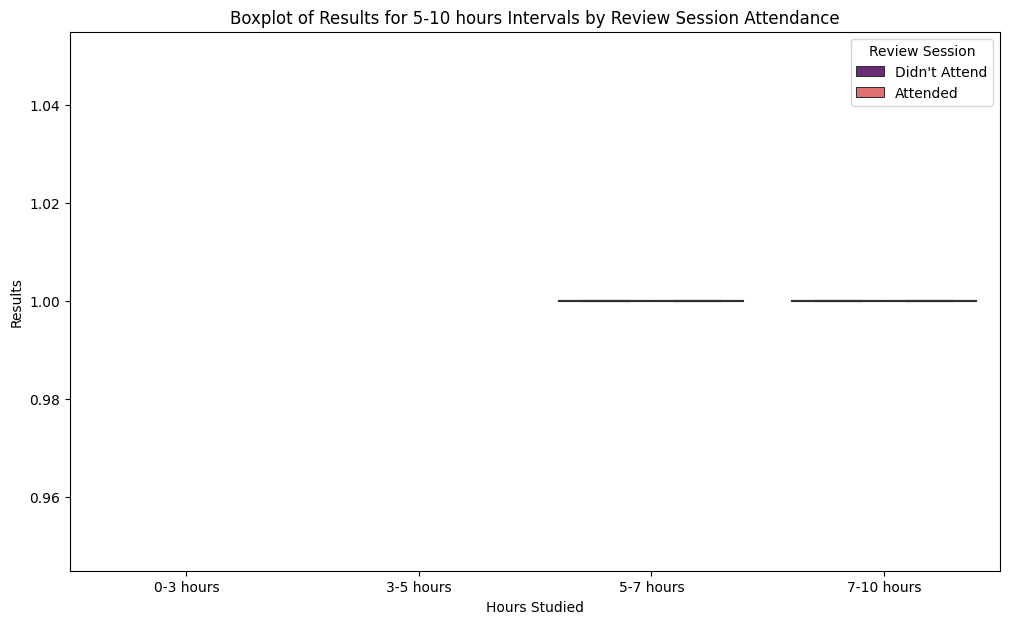

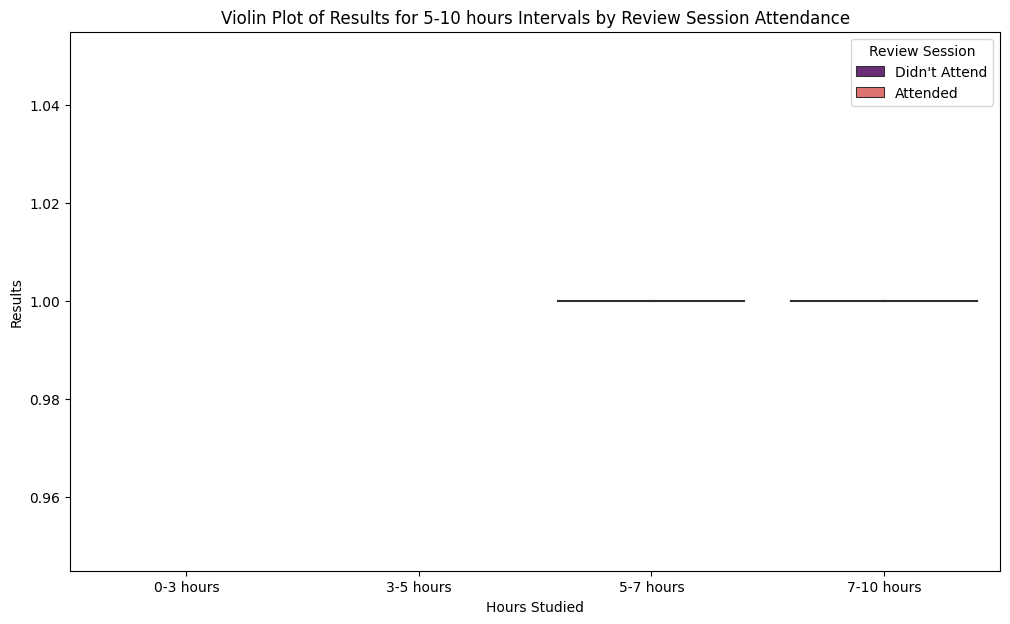

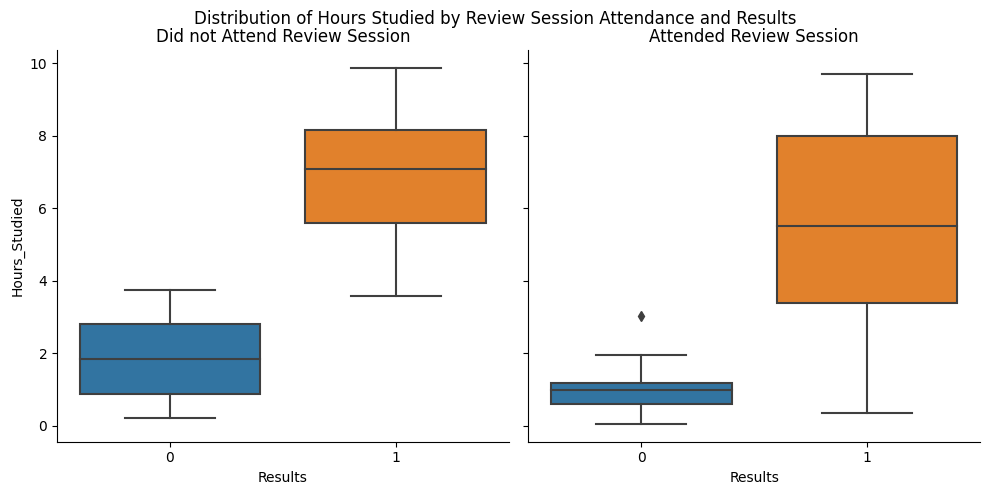

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('./student_data.csv')

df = pd.DataFrame(data)
print(df.head())


# Binning the Hours_Studied into categories
bins = [0, 3, 5, 7, 10]
labels = ["0-3 hours", "3-5 hours", "5-7 hours", "7-10 hours"]
df['Hours_Studied_Binned'] = pd.cut(df['Hours_Studied'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Hours_Studied_Binned', y='Results', data=df, hue='Review_Session', palette="magma", ci=None)

plt.title("Bar Chart of Pass Rates by Hours Studied and Review Session Attendance")
plt.xlabel("Hours Studied")
plt.ylabel("Pass Rate")
plt.legend(title="Review Session", labels=["Didn't Attend", "Attended"])
plt.show()



# Filter the DataFrame to only contain rows for the interval between 5 to 10 hours
df_filtered = df[(df['Hours_Studied'] >= 5) & (df['Hours_Studied'] <= 10)]

# Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Hours_Studied_Binned', y='Results', data=df_filtered, hue='Review_Session', palette="magma")
plt.title("Boxplot of Results for 5-10 hours Intervals by Review Session Attendance")
plt.xlabel("Hours Studied")
plt.ylabel("Results")
plt.legend(title="Review Session", labels=["Didn't Attend", "Attended"])
plt.show()

# Violin Plot
plt.figure(figsize=(12, 7))
sns.violinplot(x='Hours_Studied_Binned', y='Results', data=df_filtered, hue='Review_Session', palette="magma", split=True)
plt.title("Violin Plot of Results for 5-10 hours Intervals by Review Session Attendance")
plt.xlabel("Hours Studied")
plt.ylabel("Results")
plt.legend(title="Review Session", labels=["Didn't Attend", "Attended"])
plt.show()


# Create a facetted boxplot
g = sns.catplot(data=df, x="Results", y="Hours_Studied", col="Review_Session", kind="box")

# Setting titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Hours Studied by Review Session Attendance and Results')
g.axes[0,0].set_title('Did not Attend Review Session')
g.axes[0,1].set_title('Attended Review Session')

plt.show()


## Since 5-10 hours its saturated let me dig in more

   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


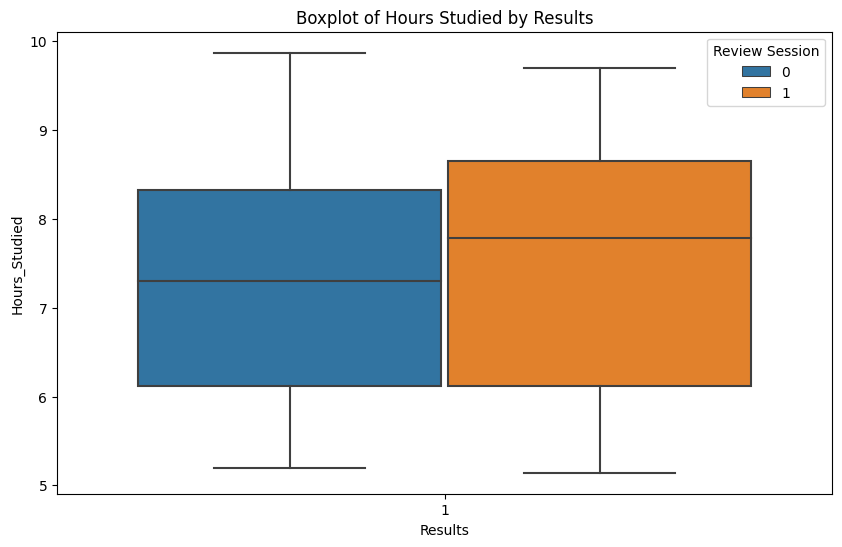

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('./student_data.csv')

df = pd.DataFrame(data)
print(df.head())

df_filtered = df[df['Hours_Studied'] > 5]


plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x='Results', y='Hours_Studied', hue='Review_Session')
plt.title("Boxplot of Hours Studied by Results")
plt.legend(title="Review Session")
plt.show()



/Users/mounachimata15/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.2'` for same effect.
  warnings.warn(msg, FutureWarning)


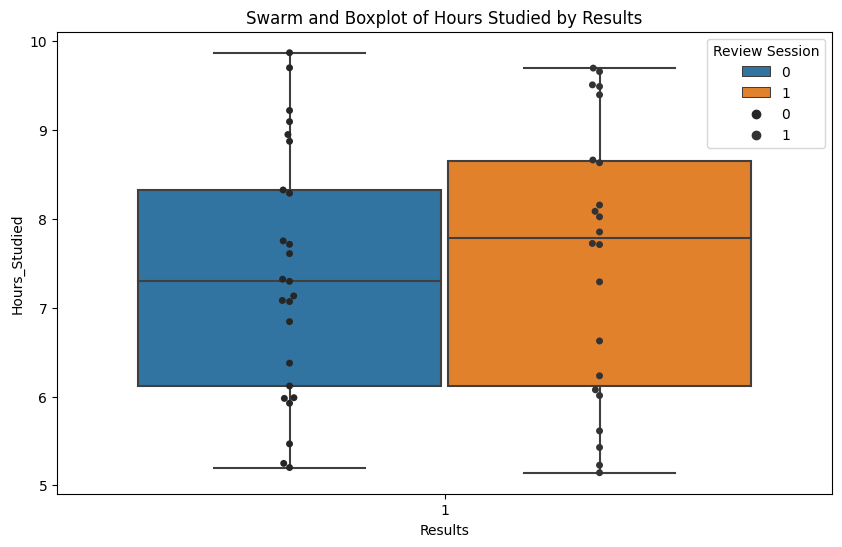

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x='Results', y='Hours_Studied', hue='Review_Session')
sns.swarmplot(data=df_filtered, x='Results', y='Hours_Studied', hue='Review_Session', dodge=True, color=".2")
plt.title("Swarm and Boxplot of Hours Studied by Results")
plt.legend(title="Review Session")
plt.show()


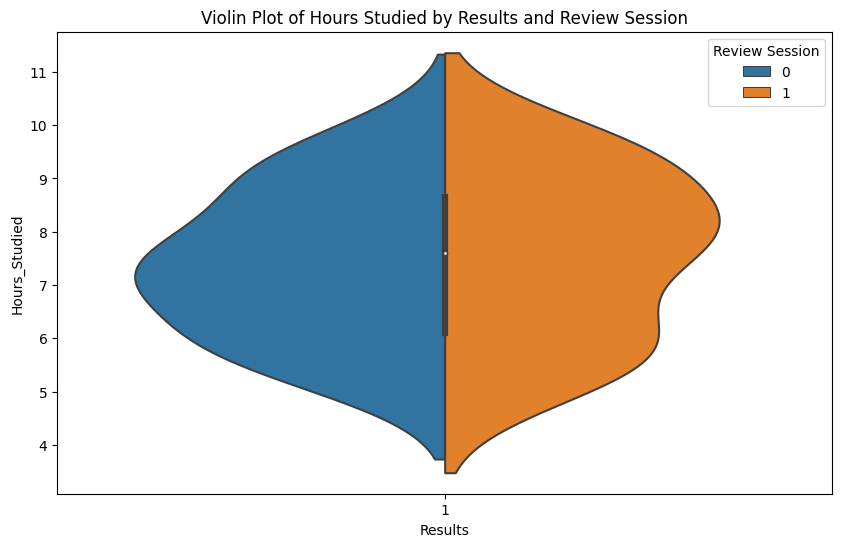

   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


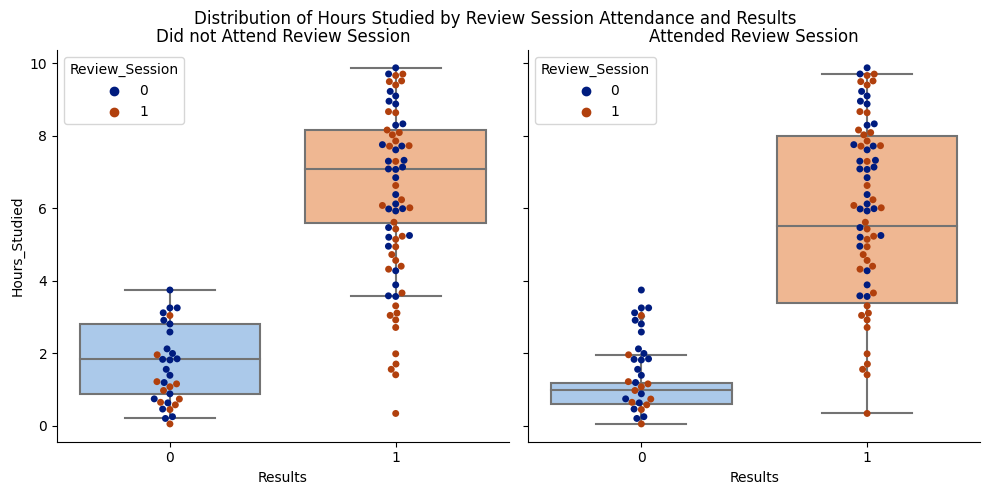

In [95]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_filtered, x='Results', y='Hours_Studied', hue='Review_Session', split=True)
plt.title("Violin Plot of Hours Studied by Results and Review Session")
plt.legend(title="Review Session")
plt.show()





import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('./student_data.csv')

df = pd.DataFrame(data)
print(df.head())


# Create a facetted boxplot with additional features
g = sns.catplot(data=df, x="Results", y="Hours_Studied", col="Review_Session", kind="box", height=5, aspect=1, palette="pastel")

# Overlay swarmplot
sns.swarmplot(data=df, x="Results", y="Hours_Studied", hue="Review_Session", palette="dark", ax=g.axes[0, 0])
sns.swarmplot(data=df, x="Results", y="Hours_Studied", hue="Review_Session", palette="dark", ax=g.axes[0, 1])

# Setting titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Hours Studied by Review Session Attendance and Results')
g.axes[0,0].set_title('Did not Attend Review Session')
g.axes[0,1].set_title('Attended Review Session')

plt.show()



For failing students: Attending a review session seems to suggest a broader range of study hours, but on average, they studied a bit more than those who didn't attend.
For passing students: Those who did not attend the review session generally studied more hours (with a peak at 9 hours) compared to those who attended the session. This might indicate that the review session helped students achieve similar results with potentially fewer self-study hours.

## (2) fit a model using logistic regression,


Coefficients: [[0.92519784 1.10466804]]

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.91      0.94      0.93        68

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100


AUC: 0.9738051470588236


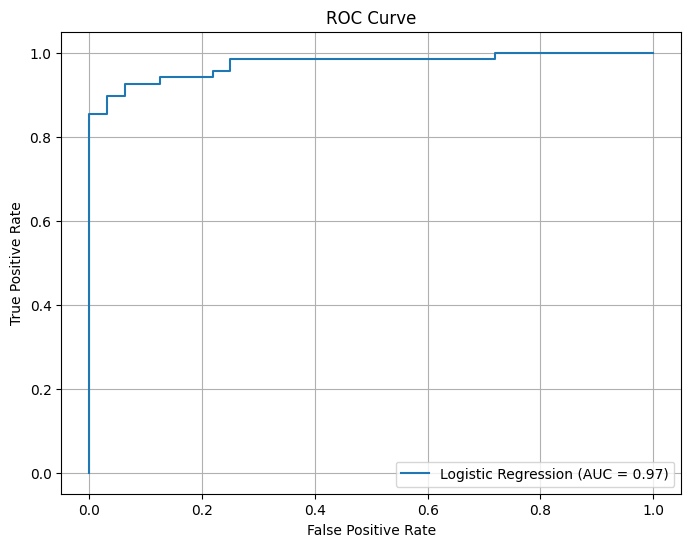

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('./student_data.csv')

df = pd.DataFrame(data)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Preparing the data
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Training the logistic regression model
logreg = LogisticRegression(solver='liblinear') # Using 'liblinear' solver for binary classification
logreg.fit(X, y)

# Making predictions on the same dataset
y_pred = logreg.predict(X)
y_pred_prob = logreg.predict_proba(X)[:, 1] # probabilities for class 1

# Outputting model's coefficients
print("\nCoefficients:", logreg.coef_)

# Evaluating the model
print("\nAccuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# AUC Score
auc = roc_auc_score(y, y_pred_prob)
print("\nAUC:", auc)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Task 2:  Understanding and Prevent Overfitting in the context of SVM 

Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation.


In [104]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# 1. SVM with linear kernel
linear_svc = SVC(kernel='linear')
linear_svc.fit(X, y)

# 2. SVM with RBF kernel and grid search for best gamma parameter
# Define the parameter range for gamma
param_grid = {'gamma': [0.1, 0.01, 0.001, 0.0001, 'scale', 'auto']}

# Initialize the SVC with RBF kernel
rbf_svc = SVC(kernel='rbf')

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rbf_svc, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Retrieve the best gamma value and the best estimator
best_gamma = grid_search.best_params_['gamma']
best_rbf_svc = grid_search.best_estimator_

print(f"Best gamma value for RBF kernel: {best_gamma}")



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best gamma value for RBF kernel: 0.1
